<a href="https://colab.research.google.com/github/coddingyun/pytorch/blob/main/Bookstudy_ch6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. 머신 러닝 용어 이해하기

###1. 머신 러닝 모델의 평가

훈련 - 검증 - 테스트
- 검증용 데이터: 모델의 성능을 조정 (과적합 판단, 하이퍼파라미터 튜닝)
- 하이퍼파라미터(초매개변수): 모델의 성능에 영향을 주는 매개변수, 보통 사용자가 직접 정해 줄 수 있는 변수(학습률, 은닉칭의 수, 뉴런의 수, 드롭아웃 비율)
- 매개변수: 가중치와 편향과 같은 학습을 통해 바뀌어져가는 변수, 모델이 학습하는 과정에서 얻어지는 값


###2. 분류와 회귀
1) 이진 분류 분제: 둘 중 하나의 답을 정함.

2) 다중 클래스 분류: 세 개 이상의 선택지 중 답을 정함.

3) 회귀 문제: 연속된 값을 결과로 가짐.


###3. 지도 학습과 비지도 학습
1)지도 학습: Lable이라는 정답과 함께 학습

2)비지도 학습: 목적 데이터가 없는 학습 방법 - clustering, 차원 축소

3)강화 학습: 어떤 환경 내에서 정의된 에이전트가 현재의 상태를 인식하여, 선택 가능한 행동을 중 보상을 최대화하는 행동 혹은 행동 순서를 선택하는 방법

###4. 샘플과 특성
독립 변수의 개수가 n개이고 데이터 개수가 m인 행렬에서 하나의 데이터, 하나의 행을 Sample이라 부름.

종속 변수 y를 예측하기 위한 각각의 독립 변수 x를 Feature 이라 부름.

###5. 혼동 행렬(Confusion Matrix)
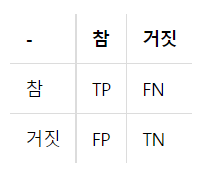
1) 정밀도(Precision): 양성이라고 대답한 전체 케이스에 대한 실제 양성의 비율

2) 재현률(Recall): 실제값이 양성인 데이터의 전체 개수에 대한 실제 양성의 비율

###6. 과적합(Overfitting)과 과소 적합(Underfitting)

- Ovefitting: 훈련 데이터를 과하게 학습하여 테스트 데이터에는 정확도가 좋지 않은 경우, 테스트 데이터의 오차가 증거하기 전이나 정확도가 감소하기 전에 훈련을 멈추는 것이 좋다.

- Underfitting: 훈련 자체가 부족한 상태, 훈련 데이처에 대해서도 보통 정확도가 낮음.

- 머신러닝에서 학습 또는 훈련을 적합(fitting)이라 부를 수도 있다.

#2. 퍼셉트론(Perceptron)

###1. 퍼셉트론
: 초기 형태의 인공 신경망으로 다수의 입력으로부터 하나의 결과를 내보내는 알고리즘

- 가중치가 크면 클수록 해당 입력 값이 중요
- 각 입력값이 가중치와 곱해져 인공 뉴런에 보내지고, 입력값과 가중치의 곱의 전체 합이 임계치를 넘으면 인공뉴런은 1 출력, 아닐 경우 0 출력. -> 계단 함수(Step function)
- 활성화 함수(Activation Function): 뉴런에서 출력값을 변경시키는 함수

#2. 단층 퍼셉트론
: 값을 보내는 단계와 값을 받아서 출력하는 두 단계로만 이루어짐. - input layer, output layer

In [ ]:
# 두개의 입력값이 1인 경우에만 1 출력
def AND_gate(x1, x2):
  w1=0.5
  w2=0.5
  b=-0.7
  result = x1*w1 + x2*w2 + b
  if result <=0:
    return 0
  else:
    return 1

In [ ]:
# 두개의 입력값이 1인 경우에만 0 출력
def NAND_gate(x1, x2):
  w1=-0.5
  w2=-0.5
  b=0.7
  result = x1*w1 + x2*w2 + b
  if result <= 0:
    return 0
  else:
    return 1

In [ ]:
#하나라도 1을 가지고 있으면 1출력
def OR_gate(x1,x2):
  w1=0.6
  w2=0.6
  b=-0.5
  result = x1*w1 + x2*w2 + b
  if result <= 0:
    return 0
  else:
    return 1

###3. 다층 퍼셉트론
:XOR_gate가능, 은닉층 존재

- 심층 신경망(DNN): 은닉층이 2개 이상인 신경망

- 딥 러닝: 심층 신경망 학습

In [ ]:
def XOR_gate(x1,x2):
  s1=NAND_gate(x1,x2)
  s2=OR_gate(x1,x2)
  y=AND_gate(s1,s2)
  return y

In [ ]:
inputs = [(0, 0), (1, 0), (0, 1), (1, 1)]
for x1, x2 in inputs:
    y = XOR_gate(x1, x2)
    print('({x1}, {x2}) -> {y}'.format(x1=x1, x2=x2, y=y))

(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


#3. XOR 문제 - 단층 퍼셉트론 구현하기

###1. 파이토치로 단틍 퍼셉트론 구현하기

In [ ]:
import torch
import torch.nn as nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

In [ ]:
X = torch.FloatTensor([[0,0], [0,1], [1,0], [1,1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [ ]:
linear = nn.Linear(2,1,bias=True)
sigmoid = nn.Sigmoid()
model = nn.Sequential(linear, sigmoid).to(device)

In [ ]:
criterion=nn.BCELoss().to(device)
optimizer=torch.optim.SGD(model.parameters(), lr=1)

In [ ]:
for step in range(10001):
  optimizer.zero_grad()
  hypothesis = model(X)

  cost = criterion(hypothesis, Y)
  cost.backward()
  optimizer.step()

  if step % 100 ==0:
    print(step, cost.item())

0 0.7273974418640137
100 0.6931476593017578
200 0.6931471824645996
300 0.6931471824645996
400 0.6931471824645996
500 0.6931471824645996
600 0.6931471824645996
700 0.6931471824645996
800 0.6931471824645996
900 0.6931471824645996
1000 0.6931471824645996
1100 0.6931471824645996
1200 0.6931471824645996
1300 0.6931471824645996
1400 0.6931471824645996
1500 0.6931471824645996
1600 0.6931471824645996
1700 0.6931471824645996
1800 0.6931471824645996
1900 0.6931471824645996
2000 0.6931471824645996
2100 0.6931471824645996
2200 0.6931471824645996
2300 0.6931471824645996
2400 0.6931471824645996
2500 0.6931471824645996
2600 0.6931471824645996
2700 0.6931471824645996
2800 0.6931471824645996
2900 0.6931471824645996
3000 0.6931471824645996
3100 0.6931471824645996
3200 0.6931471824645996
3300 0.6931471824645996
3400 0.6931471824645996
3500 0.6931471824645996
3600 0.6931471824645996
3700 0.6931471824645996
3800 0.6931471824645996
3900 0.6931471824645996
4000 0.6931471824645996
4100 0.6931471824645996
4200

200~1000 cost 줄어들지 않는다 -> 단층 퍼셉트론으로는 XOR를 풀 수 없기 때문

In [ ]:
with torch.no_grad():
  hypothesis = model(X)
  predicted = (hypothesis>0.5).float()
  accuracy = (predicted==Y).float().mean()
  print('모델 출력값/Hypothesis', hypothesis.detach().cpu().numpy())
  print('모델 예측값/Predicted', predicted.detach().cpu().numpy())
  print('실제값/Y', Y.cpu().numpy())
  print('정확도/Accuracy', accuracy.item())

모델 출력값/Hypothesis [[0.5]
 [0.5]
 [0.5]
 [0.5]]
모델 예측값/Predicted [[0.]
 [0.]
 [0.]
 [0.]]
실제값/Y [[0.]
 [1.]
 [1.]
 [0.]]
정확도/Accuracy 0.5


#4. 역전파

###1. 인공 신경망의 이해

- 인공 신경망은 입력층, 은닉층, 출력층 3개를 가짐
- 은닉층과 출력층의 모든 뉴런은 활성화 함수로 시그모이드 함수를 사용
- 은닉층과 출력층의 모든 뉴런에는 변수 z가 존재하고, 이는 이전층의 모든 입력이 각각의 가중치와 곱해진 값들이 모든 더해진 가중합을 의미 - 활성화 함수의 입력

###2. 순전파(Forward Propagation)

1. 가중합 계산, 은닉층 뉴런의 시그모이드 함수의 입력값이 됨.
2. 시그모이드 함수가 리턴하는 결과값은 은닉층 뉴런의 최종 출력값
3. 출력층 뉴런에서 시그모이드 함수를 지난 값은 이 인공신경망이 최종적으로 계산한 출력값 = 예측값
4. 오차 함수 선택, MSE

- 실제값: target, 예측값: output


###3. 역전파
- 역전파 1단계
:출력층과 입력층(N층) 사이의 가중치 업데이트
- 역전파 2단계
:N층과 입력층 사이의 가중치 업데이트

이후에 순전파를 통해 결과값을 확인하면 오차가 줄어드는 것을 알 수 있다.

#4. XOR 문제 - 다층 퍼셉트론 구현하기

###1. 파이토치로 다층 퍼셉트론 구현하기

In [ ]:
import torch
import torch.nn as nn

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

In [ ]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [ ]:
model = nn.Sequential(
    nn.Linear(2,10,bias=True),
    nn.Sigmoid(),
    nn.Linear(10,10,bias=True),
    nn.Sigmoid(),
    nn.Linear(10,10,bias=True),
    nn.Sigmoid(),
    nn.Linear(10,1,bias=True),
    nn.Sigmoid()
).to(device)

In [ ]:
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)

In [ ]:
for epoch in range(10001):
  optimizer.zero_grad()
  hypothesis = model(X)
  cost=criterion(hypothesis, Y)
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print(epoch, cost.item())

0 0.6948983669281006
100 0.693155825138092
200 0.6931535601615906
300 0.6931513547897339
400 0.6931493282318115
500 0.6931473016738892
600 0.6931453943252563
700 0.6931434869766235
800 0.6931416988372803
900 0.6931397914886475
1000 0.6931379437446594
1100 0.6931361556053162
1200 0.6931343078613281
1300 0.6931324005126953
1400 0.6931304931640625
1500 0.6931284666061401
1600 0.6931264400482178
1700 0.6931242942810059
1800 0.6931220293045044
1900 0.6931197047233582
2000 0.6931172013282776
2100 0.6931145191192627
2200 0.6931115984916687
2300 0.6931084990501404
2400 0.6931051015853882
2500 0.6931014657020569
2600 0.6930974721908569
2700 0.6930930018424988
2800 0.6930879950523376
2900 0.6930825114250183
3000 0.6930762529373169
3100 0.6930692195892334
3200 0.6930611729621887
3300 0.6930519342422485
3400 0.6930411458015442
3500 0.6930283904075623
3600 0.6930132508277893
3700 0.6929951310157776
3800 0.6929728984832764
3900 0.6929452419281006
4000 0.6929103136062622
4100 0.6928649544715881
4200 

In [ ]:
with torch.no_grad():
  hypothesis = model(X)
  predicted = (hypothesis > 0.5).float()
  accuracy = (predicted == Y).float().mean()
  print('모델의 출력값/Hypothesis:', hypothesis.detach().cpu().numpy())
  print('모델의 예측값/Predicted:', predicted.detach().cpu().numpy())
  print('실제값/Y:', Y.cpu().numpy())
  print('정확도/Accuracy:', accuracy.item())

모델의 출력값/Hypothesis: [[1.1168801e-04]
 [9.9982882e-01]
 [9.9984229e-01]
 [1.8529482e-04]]
모델의 예측값/Predicted: [[0.]
 [1.]
 [1.]
 [0.]]
실제값/Y: [[0.]
 [1.]
 [1.]
 [0.]]
정확도/Accuracy: 1.0


#6. 비선형 활성화 함수(Activation function)
:수학적 변환을 수행하고 출력을 생성하는 함수
EX> 시그모이드 함수, 소프트맥스 함수

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

###1. 활성화 함수의 특징
- 비선형이어야 함
- 선형 함수로는 은닉층을 여러번 추가하더라고 1회 추가한 것과 차이를 줄 수 없음

###2. 시그모이드 함수와 기울기 소실
- 미분을 하여 기울기를 구할 때 시그모이드 함수 문제 생김.

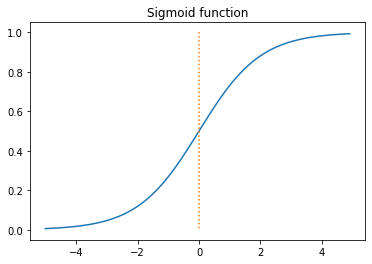

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

x=np.arange(-5.0,5.0,0.1) #-5부터 5까지 0.1간격으로 반환
y=sigmoid(x)

plt.plot(x,y)
plt.plot([0,0],[1.0,0.0], ':')
plt.title('Sigmoid function')
plt.show()

앞과 뒤쪽 그래프를 보면 기울기가 거의 0이 되어 역전파 과정에서 아주 작은 기울기가 곱해지게 되면 앞단에는 기울기가 잘 전달이 되지 않음 - > 기울기 소실 Vanishing Gradient

###3. 하이퍼볼릭탄젠트 함수
:입력값을 -1와 1사이의 값으로 변환

-1과 1에 가까운 값을 출력할때 기울기가 0에 가까움, 하지만 반환값의 변화폭이 시그모이드보다는 커서 기울기 소실 증상이 적은편.

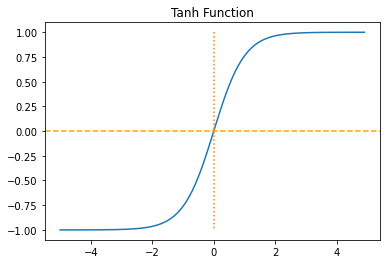

In [ ]:
x = np.arange(-5.0,5.0,0.1)
y = np.tanh(x)

plt.plot(x,y)
plt.plot([0,0],[1.0,-1.0],':')
plt.axhline(y=0, color='orange',linestyle='--')
plt.title('Tanh Function')
plt.show()

###4. 렐루 함수(ReLU)
- f(x)=max(0,x)
- 음수면 0, 양수면 입력값 그대로 반환
- 단순 임계값
- 음수면 기울기가 0, 죽은 렐루

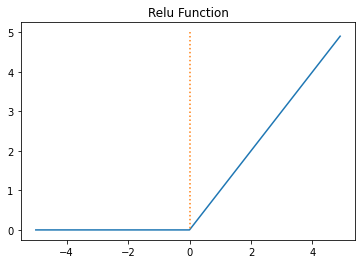

In [ ]:
def relu(x):
  return np.maximum(0,x)

x=np.arange(-5.0,5.0,0.1)
y=relu(x)

plt.plot(x,y)
plt.plot([0,0],[5.0,0.0],':')
plt.title('Relu Function')
plt.show()

###5. 리키 렐루
- 음수일 경우 매우 작은 수 반환, 0.01

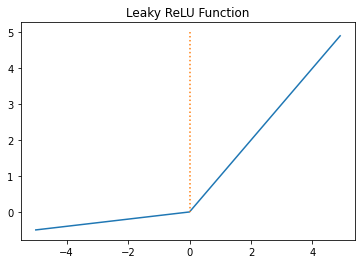

In [ ]:
a=0.1
def leaky_relu(x):
  return np.maximum(a*x,x)

x=np.arange(-5.0,5.0,0.1)
y=leaky_relu(x)

plt.plot(x,y)
plt.plot([0,0],[5.0,0.0],':')
plt.title('Leaky ReLU Function')
plt.show()

###6. Softmax function
- 출력층의 뉴런에서 주로 사용
- 이진 분류나 다중 클래스 분류 문제에 주로 사용

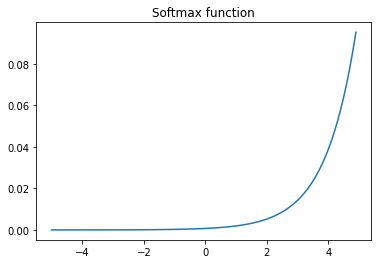

In [ ]:
x=np.arange(-5.0,5.0,0.1)
y=np.exp(x)/np.sum(np.exp(x))

plt.plot(x,y)
plt.title('Softmax function')
plt.show()

###7. 출력층의 활성화 함수와 오차 함수의 관계

- 이진 분류 - 시그모이드 - nn.BCELoss()
- 다중 클래스 분류 - 소프트맥스 - nn.CrossEntropyLoss()
- 회귀 - 없음 - MSE

- 시그모이드 함수의 문제점: 원점 중심이 아니다. 항상 양수를 출력하여 출력의 가중치 합이 입력의 가중치 합보다 커질 가능성이 높다, 편향 이동 (bias shift),  분산이 계속 커져 기울기 소실 문제

- ReLU -> LeakyReLU,ELU (sigmoid는 사용X)